# Compelete Linkage Clustering

In [1]:
import numpy as np
import sys
import math

In [2]:
X = np.array([[0,0],
    [2,0],
    [5,0],
    [0,4],    
    [4,4]])

### Manhatan Distance 

In [3]:
def max_manhatan_distance(cluster1 , cluster2):
    max_distance = 0
    for point1 in cluster1:
        for point2 in cluster2 :
            distance = abs(point1[0]-point2[0]) + abs(point1[1]-point2[1])
            if distance > max_distance:
                max_distance = distance
    return max_distance

In [4]:
def compelete_linkage_clustering(dataset , iteration= sys.maxsize):
    h_cluster = {index:[list(np.round(item , 3))] for index, item in enumerate(dataset)}
    for i in range(iteration):
        h_distance = {
         (i,j):max_manhatan_distance(val1, val2)
         for i , val1 in h_cluster.items()
         for j , val2 in h_cluster.items()
         if i != j
        }
        
        h_distance = sorted(h_distance.items() , key = lambda x : x[1])
     
        merged_cluster_index = min(h_distance[0][0])
        for index in h_distance[0][0]:
            if index != merged_cluster_index:
                for item in h_cluster[index]:
                    h_cluster[merged_cluster_index].append(item)
                del h_cluster[index]
        
        print("\nIteration " , i+1)
        for key, value in h_cluster.items():            
            print(value)
            
        if len(h_cluster)== 1:
            print("\nCompelete in iteration ", i+1)
            break;
 


In [5]:
compelete_linkage_clustering(X,4)


Iteration  1
[[0, 0], [2, 0]]
[[5, 0]]
[[0, 4]]
[[4, 4]]

Iteration  2
[[0, 0], [2, 0]]
[[5, 0]]
[[0, 4], [4, 4]]

Iteration  3
[[0, 0], [2, 0], [5, 0]]
[[0, 4], [4, 4]]

Iteration  4
[[0, 0], [2, 0], [5, 0], [0, 4], [4, 4]]

Compelete in iteration  4


In [7]:
from sklearn.metrics.pairwise import pairwise_distances
initial_distance = pairwise_distances(X ,metric = 'manhattan')

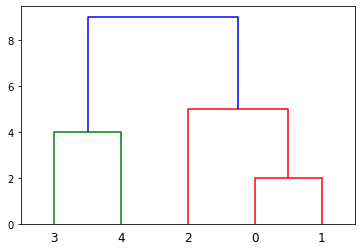

In [9]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
#'cityblock' = 'manhattan'
link_c = linkage(X, method='complete' , metric='cityblock')

plt.figure()
dendrogram(link_c , p= 5)
plt.show()